In [1]:
!pip install yfinance
!pip install mplfinance

  Attempting uninstall: pytz
    Found existing installation: pytz 2022.1
    Uninstalling pytz-2022.1:
      Successfully uninstalled pytz-2022.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.


  Using cached mplfinance-0.12.9b7-py3-none-any.whl (73 kB)


In [1]:
import ssl
import time
import json
import urllib
import hmac, hashlib
import statistics
import requests
import asyncio
import pandas as pd
import concurrent.futures
from urllib.parse import urlparse, urlencode
from urllib.request import Request, urlopen
from datetime import timezone
from collections import Counter
import time
import numpy as np
from threading import Timer
from _thread import start_new_thread
from statistics import mean
import matplotlib.pyplot as plt
from datetime import datetime
from binance.client import Client
import traceback
from numba import prange
from IPython.display import display, HTML
from scipy.signal import argrelextrema
import hmac, hashlib, urllib, requests, time
from scipy.signal import argrelextrema
from numpy import array as np_array
import matplotlib.pyplot as plt
from numpy import less, greater
from datetime import datetime
from pandas import DataFrame         

import warnings
warnings.filterwarnings('ignore')

ImportError: Numba needs NumPy 1.20 or less

In [ ]:
import pandas as pd
import yfinance as yf
import numpy as np
import math
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt

In [ ]:
class Binance():
    methods = {
            # public methods
            'ping':             {'url':'api/v1/ping', 'method': 'GET', 'private': False},
            'time':             {'url':'api/v1/time', 'method': 'GET', 'private': False},
            'exchangeInfo':     {'url':'api/v1/exchangeInfo', 'method': 'GET', 'private': False},
            'depth':            {'url': 'api/v1/depth', 'method': 'GET', 'private': False},
            'trades':           {'url': 'api/v1/trades', 'method': 'GET', 'private': False},
            'historicalTrades': {'url': 'api/v1/historicalTrades', 'method': 'GET', 'private': False},
            'aggTrades':        {'url': 'api/v1/aggTrades', 'method': 'GET', 'private': False},
            'klines':           {'url': 'api/v1/klines', 'method': 'GET', 'private': False},
            'ticker24hr':       {'url': 'api/v1/ticker/24hr', 'method': 'GET', 'private': False},
            'tickerPrice':      {'url': 'api/v3/ticker/price', 'method': 'GET', 'private': False},
            'tickerBookTicker': {'url': 'api/v3/ticker/bookTicker', 'method': 'GET', 'private': False},
            # private methods
            'createOrder':      {'url': 'api/v3/order', 'method': 'POST', 'private': True},
            'testOrder':        {'url': 'api/v3/order/test', 'method': 'POST', 'private': True},
            'orderInfo':        {'url': 'api/v3/order', 'method': 'GET', 'private': True},
            'cancelOrder':      {'url': 'api/v3/order', 'method': 'DELETE', 'private': True},
            'openOrders':       {'url': 'api/v3/openOrders', 'method': 'GET', 'private': True},
            'allOrders':        {'url': 'api/v3/allOrders', 'method': 'GET', 'private': True},
            'account':          {'url': 'api/v3/account', 'method': 'GET', 'private': True},
            'myTrades':         {'url': 'api/v3/myTrades', 'method': 'GET', 'private': True},
            # wapi
            'depositAddress':   {'url': 'wapi/v3/depositAddress.html', 'method':'GET', 'private':True},
            'withdraw':   {'url': 'wapi/v3/withdraw.html', 'method':'POST', 'private':True},
            'depositHistory': {'url': 'wapi/v3/depositHistory.html', 'method':'GET', 'private':True},
            'withdrawHistory': {'url': 'wapi/v3/withdrawHistory.html', 'method':'GET', 'private':True},
            'assetDetail': {'url': 'wapi/v3/assetDetail.html', 'method':'GET', 'private':True},
            'tradeFee': {'url': 'wapi/v3/tradeFee.html', 'method':'GET', 'private':True},
            'accountStatus': {'url': 'wapi/v3/accountStatus.html', 'method':'GET', 'private':True},
            'systemStatus': {'url': 'wapi/v3/systemStatus.html', 'method':'GET', 'private':True},
            'assetDust': {'url': 'sapi/v1/asset/dust', 'method':'POST', 'private':True},
            'dustLog': {'url': 'wapi/v3/userAssetDribbletLog.html', 'method':'GET', 'private':True},
            'assetAssetDividend': {'url': 'sapi/v1/asset/assetDividend', 'method':'GET', 'private':True},
            #sapi
            'marginTransfer': {'url': 'sapi/v1/margin/transfer', 'method': 'POST', 'private':True},
            'marginLoan': {'url': 'sapi/v1/margin/loan', 'method': 'POST', 'private': True},
            'marginLoanGet': {'url': 'sapi/v1/margin/loan', 'method': 'GET', 'private': True},
            'marginRepay': {'url': 'sapi/v1/margin/repay', 'method': 'POST', 'private': True},
            'marginRepayGet': {'url': 'sapi/v1/margin/repay', 'method': 'GET', 'private': True},
            'marginCreateOrder': {'url': 'sapi/v1/margin/order', 'method': 'POST', 'private':True},
            'marginCancelOrder': {'url': 'sapi/v1/margin/order', 'method': 'DELETE', 'private':True},
            'marginOrderInfo': {'url': 'sapi/v1/margin/order', 'method': 'GET', 'private':True},
            'marginAccount': {'url': 'sapi/v1/margin/account', 'method': 'POST', 'private':True},
            'marginOpenOrders': {'url': 'sapi/v1/margin/openOrders', 'method': 'GET', 'private':True},
            'marginAllOrders': {'url': 'sapi/v1/margin/allOrders', 'method': 'GET', 'private':True},
            'marginAsset': {'url': 'sapi/v1/margin/asset', 'method': 'POST', 'private':True},
            'marginPair': {'url': 'sapi/v1/margin/pair', 'method': 'POST', 'private':True},
            'marginPriceIndex': {'url': 'sapi/v1/margin/priceIndex', 'method': 'POST', 'private':True},
            'marginMyTrades': {'url': 'sapi/v1/margin/myTrades', 'method': 'GET', 'private':True},
            'marginMaxBorrowable': {'url': 'sapi/v1/margin/maxBorrowable', 'method': 'GET', 'private':True},
            'marginmaxTransferable': {'url': 'sapi/v1/margin/maxTransferable', 'method': 'GET', 'private':True},
            #futures
            'futuresExchangeInfo': {'url': 'fapi/v1/exchangeInfo', 'method': 'GET', 'private': False, 'futures': True},
            'futuresKlines': {'url': 'fapi/v1/klines', 'method': 'GET', 'private': False, 'futures': True},
            'futuresCreateOrder':      {'url': 'fapi/v1/order', 'method': 'POST', 'private': True, 'futures': True},
            'futuresAccount':      {'url': 'fapi/v1/account', 'method': 'POST', 'private': True, 'futures': True},
            'futuresBalance':      {'url': 'fapi/v1/balance', 'method': 'GET', 'private': True, 'futures': True},
            'futuresSymbolPriceTicker': {'url': 'fapi/v1/ticker/price', 'method': 'GET', 'private': True, 'futures': True},
            'futuresOrderInfo': {'url': 'fapi/v1/order', 'method': 'GET', 'private': True, 'futures': True},
            'futuresCancelOrder':      {'url': 'fapi/v1/order', 'method': 'DELETE', 'private': True, 'futures': True},
            'futuresPrice':      {'url': 'fapi/v1/ticker/price', 'method': 'GET', 'private': False, 'futures': True},
            'futuresDepth':      {'url': 'fapi/v1/depth', 'method': 'GET', 'private': False, 'futures': True},
            'futuresAllOrders':      {'url': 'fapi/v1/allOrders', 'method': 'GET', 'private': True, 'futures': True},
            'futuresOpenOrders':      {'url': 'fapi/v1/openOrders', 'method': 'GET', 'private': True, 'futures': True},
   }

    def __init__(self, API_KEY, API_SECRET):
        self.API_KEY = API_KEY
        self.API_SECRET = bytearray(API_SECRET, encoding='utf-8')
        self.shift_seconds = 0

    def __getattr__(self, name):
        def wrapper(*args, **kwargs):
            kwargs.update(command=name)
            return self.call_api(**kwargs)
        return wrapper

    def set_shift_seconds(self, seconds):
        self.shift_seconds = seconds

    def call_api(self, **kwargs):

        command = kwargs.pop('command')

        base_url ='https://api.binance.com/'
        if self.methods[command].get('futures'):
            base_url = 'https://fapi.binance.com/'
        api_url = base_url  + self.methods[command]['url']

        payload = kwargs
        headers = {}

        payload_str = urllib.parse.urlencode(payload)
        if self.methods[command]['private']:
            payload.update({'timestamp': int(time.time() + self.shift_seconds - 1) * 1000})
            payload_str = urllib.parse.urlencode(payload).encode('utf-8')
            sign = hmac.new(
                key=self.API_SECRET,
                msg=payload_str,
                digestmod=hashlib.sha256
            ).hexdigest()

            payload_str = payload_str.decode("utf-8") + "&signature="+str(sign)
            headers = {"X-MBX-APIKEY": self.API_KEY, "Content-Type":"application/x-www-form-urlencoded"}

        if self.methods[command]['method'] == 'GET' or self.methods[command]['url'].startswith('sapi'):
            api_url += '?' + payload_str

        response = requests.request(method=self.methods[command]['method'], url=api_url, data="" if self.methods[command]['method'] == 'GET' else payload_str, headers=headers)

        if 'code' in response.text:
            raise Exception(response.text)

        return response.json()

bot = Binance(
    API_KEY='',
    API_SECRET=''
)

In [2]:
# Импортируем необходимые библиотеки
import pandas as pd
import yfinance as yf
import numpy as np
import math
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt
# get stock prices using yfinance library


def get_stock_price(symbol):
  df = yf.download(symbol, start='2022-04-01', threads= False)
  df['Date'] = pd.to_datetime(df.index)
  df['Date'] = df['Date'].apply(mpl_dates.date2num)
  df = df.loc[:,['Date', 'Open', 'High', 'Low', 'Close']]
  return df
symbol = 'COST'
df = get_stock_price(symbol)
df

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close
Date,,,,,
2022-04-01,19083.0,577.380005,582.989990,572.309998,575.570007
2022-04-04,19086.0,573.940002,579.690002,571.469971,575.130005
2022-04-05,19087.0,572.590027,583.979980,572.099976,575.320007
2022-04-06,19088.0,574.030029,586.799988,570.369995,584.789978
2022-04-07,19089.0,592.289978,612.270020,588.780029,608.049988
...,...,...,...,...,...
2023-06-12,19520.0,517.280029,521.270020,516.000000,520.969971
2023-06-13,19521.0,522.020020,522.950012,517.909973,522.020020
2023-06-14,19522.0,525.000000,527.849976,523.140015,527.200012


In [5]:
df = pd.read_csv(r'C:\Users\agd01\таблицы с историями свечей\DOGE\interval 1 min\klines_bd_1_60.csv')
df = df.set_index('Data_new')
df['Data_new'] = pd.to_datetime(df.index)
df['Data_new'] = df['Data_new'].apply(mpl_dates.date2num)
df = df.set_index('Date')
df = df.rename(columns={"Data_new": "Date"})
df = df[['Date', 'Open', 'High', 'Low', 'Close']]
df

,Date,Open,High,Low,Close
Date,,,,,
2023-06-17,19525.589583,0.06264,0.06264,0.06263,0.06263
2023-06-17,19525.588889,0.06262,0.06264,0.06261,0.06264
2023-06-17,19525.588194,0.06261,0.06261,0.06260,0.06261
2023-06-17,19525.587500,0.06262,0.06262,0.06260,0.06261
2023-06-17,19525.586806,0.06257,0.06262,0.06256,0.06261
...,...,...,...,...,...
2023-01-01,19358.003472,0.07059,0.07061,0.07056,0.07061
2023-01-01,19358.002778,0.07062,0.07063,0.07059,0.07059
2023-01-01,19358.002083,0.07063,0.07064,0.07061,0.07063


In [11]:
#метод 1: фрактальная свеча
# определение бычьего фрактала  
def is_support(df,i):  
  cond1 = df['Low'][i] < df['Low'][i-1]   
  cond2 = df['Low'][i] < df['Low'][i+1]   
  cond3 = df['Low'][i+1] < df['Low'][i+2]   
  cond4 = df['Low'][i-1] < df['Low'][i-2]  
  return (cond1 and cond2 and cond3 and cond4) 
# определение медвежьего фрактал 
def is_resistance(df,i):  
  cond1 = df['High'][i] > df['High'][i-1]   
  cond2 = df['High'][i] > df['High'][i+1]   
  cond3 = df['High'][i+1] > df['High'][i+2]   
  cond4 = df['High'][i-1] > df['High'][i-2]  
  return (cond1 and cond2 and cond3 and cond4)
# чтобы проверить, что область нового уровня еще не существует
def is_far_from_level(value, levels, df):    
  ave =  np.mean(df['High'] - df['Low'])    
  return np.sum([abs(value-level)<ave for _,level in levels])==0
# список для хранения уровней сопротивления и поддержки
levels = []
for i in range(2, df.shape[0] - 2):  
  if is_support(df, i):    
    low = df['Low'][i]    
    if is_far_from_level(low, levels, df):      
      levels.append((i, low))  
  elif is_resistance(df, i):    
    high = df['High'][i]    
    if is_far_from_level(high, levels, df):      
      levels.append((i, high))

In [12]:
print(len(levels))
levels

19942


[(76, 0.06267),
 (111, 0.06253),
 (127, 0.06277),
 (145, 0.06247),
 (156, 0.06242),
 (164, 0.06255),
 (174, 0.06262),
 (195, 0.06245),
 (223, 0.06256),
 (225, 0.06263),
 (255, 0.06245),
 (287, 0.06268),
 (299, 0.06271),
 (302, 0.0626),
 (309, 0.06287),
 (326, 0.06298),
 (412, 0.06199),
 (420, 0.06179),
 (426, 0.06182),
 (437, 0.06196),
 (459, 0.06168),
 (471, 0.06197),
 (486, 0.06209),
 (522, 0.06192),
 (526, 0.06199),
 (537, 0.06198),
 (567, 0.06197),
 (575, 0.06182),
 (581, 0.06212),
 (588, 0.06194),
 (633, 0.06204),
 (645, 0.0619),
 (662, 0.06213),
 (665, 0.06201),
 (669, 0.06218),
 (675, 0.06215),
 (695, 0.06215),
 (702, 0.06202),
 (722, 0.06204),
 (744, 0.06205),
 (791, 0.06169),
 (825, 0.06213),
 (924, 0.06212),
 (944, 0.06225),
 (946, 0.06209),
 (958, 0.06221),
 (960, 0.06209),
 (964, 0.06237),
 (968, 0.06217),
 (996, 0.06228),
 (1014, 0.06266),
 (1022, 0.06265),
 (1027, 0.06193),
 (1032, 0.06196),
 (1044, 0.06202),
 (1059, 0.06205),
 (1066, 0.062),
 (1073, 0.06163),
 (1083, 0.0

Wall time: 1min 32s


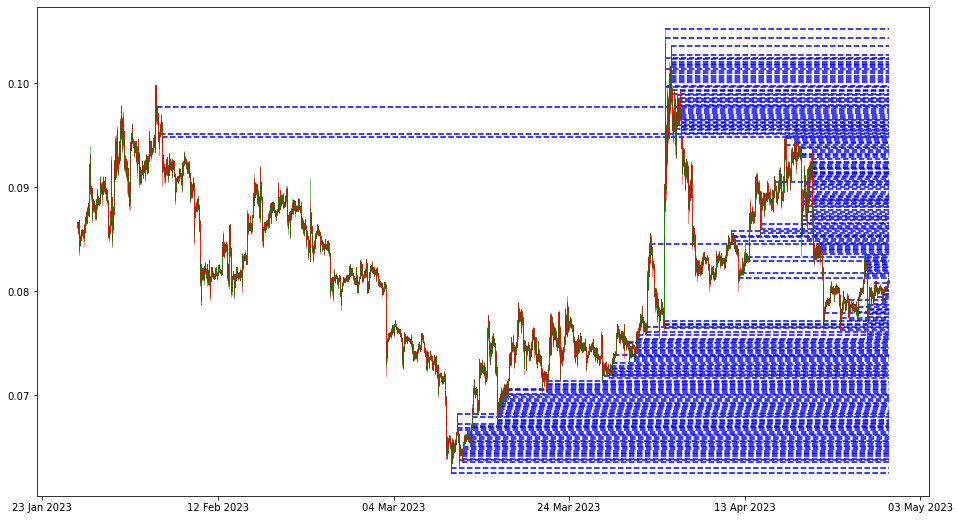

In [13]:
%%time
# для визуализаций
def plot_all(levels, df):    
  fig, ax = plt.subplots(figsize=(16, 9))   
  candlestick_ohlc(ax,df.values,width=0.007, colorup='green', 
    colordown='red', alpha=0.8)    
  date_format = mpl_dates.DateFormatter('%d %b %Y')
  ax.xaxis.set_major_formatter(date_format)    
  for level in levels:        
    plt.hlines(level[1], xmin = df['Date'][level[0]], xmax = 
      max(df['Date']), colors='blue', linestyle='--')    
  fig.show()

plot_all(levels, df)

ValueError: could not broadcast input array from shape (1415,) into shape (1,)

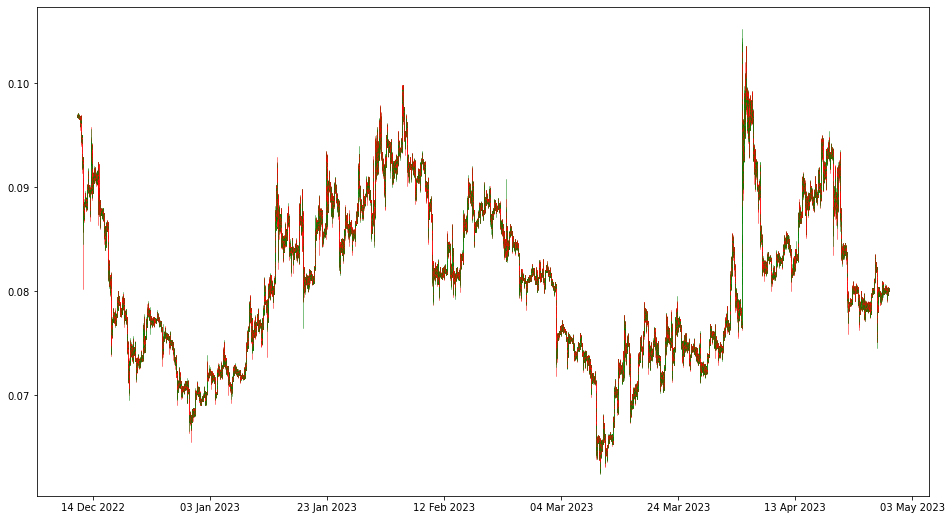

In [17]:
#метод 2: сдвиг окна
#используется тот же символ, что и в первом примере выше
pivots = []
max_list = []
min_list = []
for i in range(5, len(df)-5):
  # берем окно из 9 свечей
  high_range = df['High'][i-5:i+4]
  current_max = high_range.max()
  # если мы найдем новое максимальное значение, очистим max_list 
  if current_max not in max_list:
    max_list = []
  max_list.append(current_max)
  # если максимальное значение остается прежним после 5-кратного сдвига
  if len(max_list)==5 and is_far_from_level(current_max,pivots,df):
      pivots.append((high_range.idxmax(), current_max))
    
  low_range = df['Low'][i-5:i+5]
  current_min = low_range.min()
  if current_min not in min_list:
    min_list = []
  min_list.append(current_min)
  if len(min_list)==5 and is_far_from_level(current_min,pivots,df):
    pivots.append((low_range.idxmin(), current_min))
plot_all(pivots, df)

In [18]:
#метод 1: фрактальная свеча
def detect_level_method_1(df):
  levels = []
  for i in range(2,df.shape[0]-2):
    if is_support(df,i):
      l = df['Low'][i]
      if is_far_from_level(l, levels, df):
        levels.append((i,l))
    elif is_resistance(df,i):
      l = df['High'][i]
      if is_far_from_level(l, levels, df):
        levels.append((i,l))
  return levels

#метод 2: сдвиг окна
def detect_level_method_2(df):
  levels = []
  max_list = []
  min_list = []
  for i in range(5, len(df)-5):
      high_range = df['High'][i-5:i+4]
      current_max = high_range.max()
      if current_max not in max_list:
          max_list = []
      max_list.append(current_max)
      if len(max_list) == 5 and is_far_from_level(current_max, levels, df):
          levels.append((high_range.idxmax(), current_max))
      
      low_range = df['Low'][i-5:i+5]
      current_min = low_range.min()
      if current_min not in min_list:
          min_list = []
      min_list.append(current_min)
      if len(min_list) == 5 and is_far_from_level(current_min, levels, df):
          levels.append((low_range.idxmin(), current_min))
  return levels

# обнаружение прорыва
def has_breakout(levels, previous, last):
  for _, level in levels:
    cond1 = (previous['Open'] < level) 
    cond2 = (last['Open'] > level) and (last['Low'] > level)
  return (cond1 and cond2)

# списки для хранения проверенных результатов
screened_list_1 = [] 
screened_list_2 = []

# получить полный список акций S&P 500 
payload=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
stock_list = payload[0]['Symbol'].values.tolist()

# цикл по каждому символу
for symbol in stock_list:
  try: 
    df = get_stock_price(symbol)
    
    # получить уровни, используя первый метод
    levels_1 = detect_level_method_1(df)
    if (has_breakout(levels_1[-5:], df.iloc[-2], df.iloc[-1])):
      screened_list_1.append(symbol)

    # получить уровни, используя второй метод
    levels_2 = detect_level_method_2(df)
    if (has_breakout(levels_2[-5:], df.iloc[-2], df.iloc[-1])):
      screened_list_2.append(symbol)

  except Exception as e:
    print(e)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [19]:
screened_list_1

['MDT']

In [20]:
screened_list_2

[]

[*********************100%***********************]  1 of 1 completed


C:\Users\agd01\AppData\Local\Temp/ipykernel_18360/3949880234.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


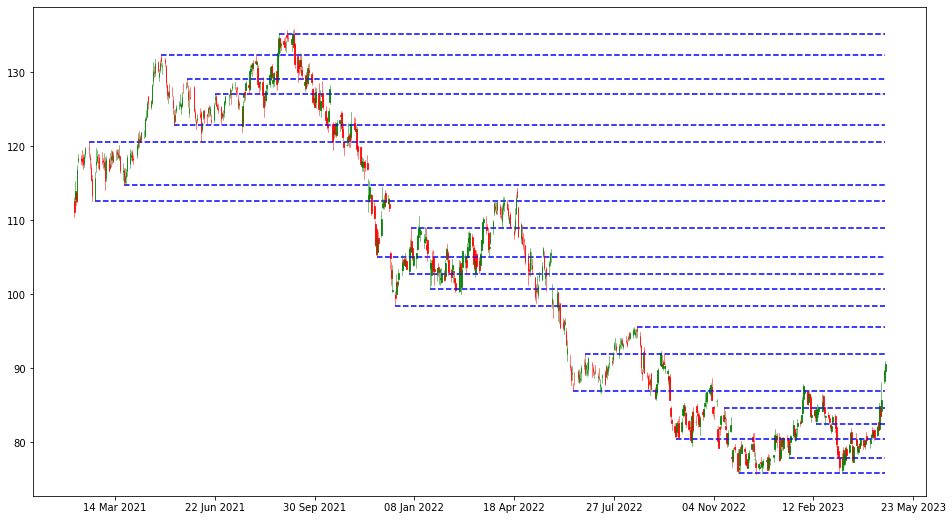

In [21]:
#метод 2: сдвиг окна
#используется тот же символ, что и в первом примере выше
symbol = 'MDT'
df = get_stock_price(symbol)
pivots = []
max_list = []
min_list = []
for i in range(5, len(df)-5):
  # берем окно из 9 свечей
  high_range = df['High'][i-5:i+4]
  current_max = high_range.max()
  # если мы найдем новое максимальное значение, очистим max_list 
  if current_max not in max_list:
    max_list = []
  max_list.append(current_max)
  # если максимальное значение остается прежним после 5-кратного сдвига
  if len(max_list)==5 and is_far_from_level(current_max,pivots,df):
      pivots.append((high_range.idxmax(), current_max))
    
  low_range = df['Low'][i-5:i+5]
  current_min = low_range.min()
  if current_min not in min_list:
    min_list = []
  min_list.append(current_min)
  if len(min_list)==5 and is_far_from_level(current_min,pivots,df):
    pivots.append((low_range.idxmin(), current_min))
plot_all(pivots, df)

In [4]:
a=1

In [1]:
def out_red(*text):
    print("\033[31m {}" .format(text))
def out_yellow(*text):
    print("\033[33m {}" .format(text))
def out_blue(*text):
    print("\033[34m {}" .format(text))
out_red(f"Вывод красным цветом")
out_yellow("Текст жёлтого цвета")
out_blue("Синий текст")

 ('Вывод красным цветом',)
 ('Текст жёлтого цвета',)
 ('Синий текст',)


In [6]:
class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    
print(f"{bcolors.OKCYAN}Warning: No active frommets remain. Continue {a}?{bcolors.OKCYAN}")
